# Sentiment Analysis of Emotions

## Introduction

In this project, we aim to classify emotions from text data using two machine learning models: Naive Bayes and Support Vector Machine (SVM). These models are well-suited for text classification tasks, with Naive Bayes being known for its simplicity and effectiveness in handling textual data, and SVM for its robustness with high-dimensional spaces. We will evaluate and compare the performance of these models based on accuracy, precision, recall, and other relevant metrcs.
rics.


### 1. Importing Libraries and Loading Data

#### 1.1 Importing Libraries

In [552]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
from bs4 import BeautifulSoup

# Libraries for NLP and model building
import nltk
from nltk.corpus import stopwords

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

#### 1.2 Importing Dataset

In [554]:
# Load the test.txt dataset
df_test = pd.read_csv('./dataset/train.txt', names=['Text', 'Emotion'], sep=';')

In [555]:
# Display the first few rows of the dataset
df_test.head()

,Text,Emotion
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger


In [556]:
# Print the shape of the dataset (number of rows and columns)
print(df_test.shape)

(16000, 2)


#### 1.3 Emotion Distribution using Pie Chart

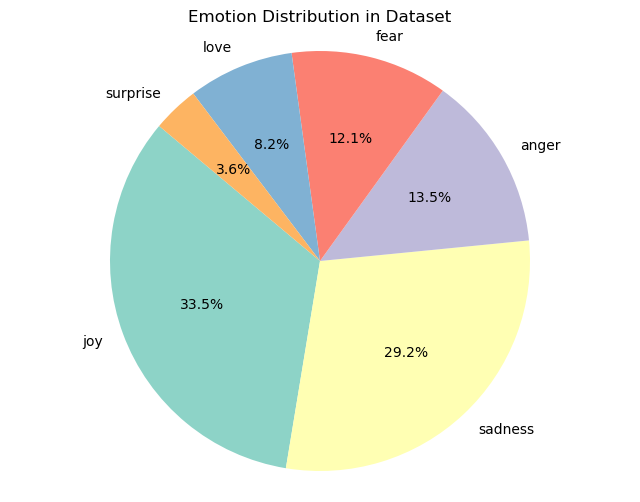

In [558]:
# Display a pie chart of emotion counts
emotion_counts = df_test['Emotion'].value_counts()

# Create the pie chart
plt.figure(figsize=(8, 6))
plt.pie(emotion_counts, labels=emotion_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("Set3", len(emotion_counts)))
plt.title('Emotion Distribution in Dataset')
plt.axis('equal')  # Equal aspect ratio ensures that pie chart is circular.
plt.show()

#### 1.4 Emotion Counts using Bar Chart

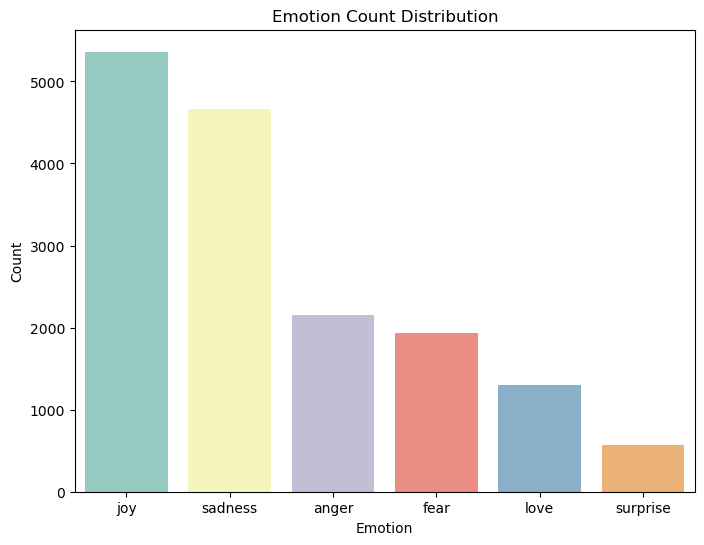

In [560]:
# Display emotion counts
emotion_counts = df_test['Emotion'].value_counts()

# Convert the emotion counts to a DataFrame for use in seaborn
emotion_counts_df = emotion_counts.reset_index()
emotion_counts_df.columns = ['Emotion', 'Count']

# Bar chart with hue assigned
plt.figure(figsize=(8, 6))
sns.barplot(x='Emotion', y='Count', data=emotion_counts_df, palette="Set3", hue='Emotion')
plt.title('Emotion Count Distribution')
plt.xlabel('Emotion')
plt.ylabel('Count')
plt.show()

### 2. Data Preprocessing

#### 2.1 Cleaning the Data

Remove the HTML tags, URL patters, unwanted patters, special characters and numbers, and removal of stopwords

In [564]:
# Function to clean the text
def clean_text(text):
    # Remove HTML tags using BeautifulSoup (in case some tags are still in text form)
    text = BeautifulSoup(text, "html.parser").get_text()

    # Remove any URL patterns (http, https, ftp, etc.)
    text = re.sub(r'http[s]?://\S+', '', text)
    
    # Remove any other unwanted patterns like href, src, etc.
    text = re.sub(r'\b(?:href|src|alt|title|class|id|style|rel|data)\b', '', text)

    # Remove special characters and numbers (keeping only alphabets and spaces)
    text = re.sub(r'[^a-zA-Z\s]', '', text)

    # Convert to lowercase
    text = text.lower()

    # Remove stopwords (optional, can be added if you have a stopwords list)
    stop_words = set(stopwords.words('english'))
    text = ' '.join(word for word in text.split() if word not in stop_words)

    return text

# Apply the cleaning function to the 'Text' column
df_test['Cleaned_Text'] = df_test['Text'].apply(clean_text)
# Save the cleaned DataFrame to a CSV file
df_test.to_csv('./dataset/cleaned_data.csv', index=False)

In [565]:
# Display cleaned text
df_test[['Text', 'Cleaned_Text']].head()

,Text,Cleaned_Text
0,i didnt feel humiliated,didnt feel humiliated
1,i can go from feeling so hopeless to so damned...,go feeling hopeless damned hopeful around some...
2,im grabbing a minute to post i feel greedy wrong,im grabbing minute post feel greedy wrong
3,i am ever feeling nostalgic about the fireplac...,ever feeling nostalgic fireplace know still pr...
4,i am feeling grouchy,feeling grouchy


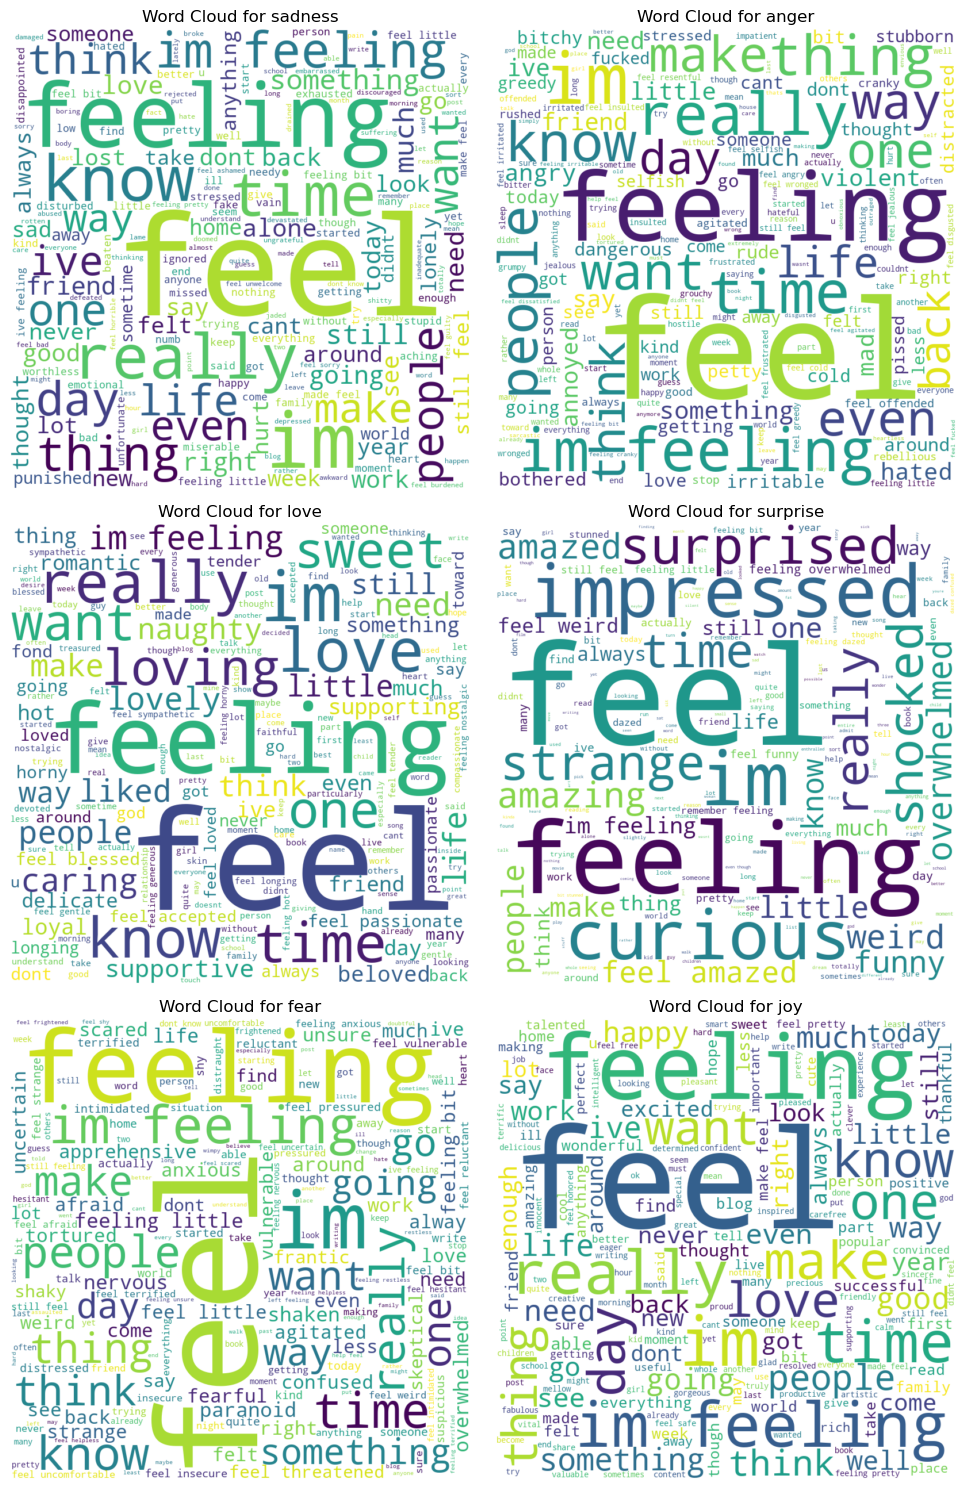

In [566]:
# Generate word clouds for each emotion category
unique_emotions = df_test['Emotion'].unique()

# Dynamically calculate the number of rows and columns for the subplots
num_emotions = len(unique_emotions)
cols = 2  # Fixed number of columns (you can adjust this)
rows = np.ceil(num_emotions / cols).astype(int)  # Calculate the required rows

# Create a plot for each emotion category
plt.figure(figsize=(10, 5 * rows))
for i, emotion in enumerate(unique_emotions, 1):
    # Filter the DataFrame for the current emotion
    emotion_text = df_test[df_test['Emotion'] == emotion]['Cleaned_Text'].str.cat(sep=' ')

    # Generate the word cloud
    wordcloud = WordCloud(width=800, height=800, background_color='white', max_words=200).generate(emotion_text)

    # Display the word cloud
    plt.subplot(rows, cols, i)  # Dynamically adjust subplots based on the number of categories
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud for {emotion}')

plt.tight_layout()
plt.show()

#### 2.2 Label Encoding

In [568]:
# Convert categorical emotions to numerical values
label_encoder = LabelEncoder()
df_test['Emotion_Label'] = label_encoder.fit_transform(df_test['Emotion'])

# Display the mapping of labels
print(dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_))))

{'anger': 0, 'fear': 1, 'joy': 2, 'love': 3, 'sadness': 4, 'surprise': 5}


In [569]:
df_test.head()

,Text,Emotion,Cleaned_Text,Emotion_Label
0,i didnt feel humiliated,sadness,didnt feel humiliated,4
1,i can go from feeling so hopeless to so damned...,sadness,go feeling hopeless damned hopeful around some...,4
2,im grabbing a minute to post i feel greedy wrong,anger,im grabbing minute post feel greedy wrong,0
3,i am ever feeling nostalgic about the fireplac...,love,ever feeling nostalgic fireplace know still pr...,3
4,i am feeling grouchy,anger,feeling grouchy,0


#### 2.3 Splitting the Data

In [571]:
# Splitting data into features and target variable
X = df_test['Cleaned_Text']  # Feature (text)
y = df_test['Emotion_Label']  # Target (emotion label)

# Split the dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### 3. TF-IDF Vectorization

In [573]:
# Initialize TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer()

In [574]:
# Fit and transform the training data, transform the test data
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

In [575]:
# Display the shape of the transformed features
print("Shape of X_train:", X_train_tfidf.shape)
print("Shape of X_test:", X_test_tfidf.shape)

Shape of X_train: (12800, 13352)
Shape of X_test: (3200, 13352)


### 4. Training and Testing Models

In [597]:
# Dictionary to store results
results = {
    'Naive Bayes': {},
    'SVM': {},
    'Logistic Regression': {},
    # 'Random Forest': {},
    # 'Decision Tree': {},
    # 'KNN': {},
    # 'Neural Network (MLP)': {}
}

#### 4.1 Naive Bayes

In [601]:
# Model 1: Naive Bayes
nb_model = MultinomialNB()
nb_model.fit(X_train_tfidf, y_train)

# Predict on train and test data
y_train_pred_nb = nb_model.predict(X_train_tfidf)
y_test_pred_nb = nb_model.predict(X_test_tfidf)

# Store Naive Bayes results
results['Naive Bayes']['train'] = {
    'accuracy': accuracy_score(y_train, y_train_pred_nb),
    'classification_report': classification_report(y_train, y_train_pred_nb),
    'confusion_matrix': confusion_matrix(y_train, y_train_pred_nb)
}
results['Naive Bayes']['test'] = {
    'accuracy': accuracy_score(y_test, y_test_pred_nb),
    'classification_report': classification_report(y_test, y_test_pred_nb),
    'confusion_matrix': confusion_matrix(y_test, y_test_pred_nb)
}

#### 4.2 Support Vector Machine (SVM)

In [604]:
# Model 2: SVM
svm_model = SVC(kernel='linear')
svm_model.fit(X_train_tfidf, y_train)

# Predict on train and test data
y_train_pred_svm = svm_model.predict(X_train_tfidf)
y_test_pred_svm = svm_model.predict(X_test_tfidf)

# Store SVM results
results['SVM']['train'] = {
    'accuracy': accuracy_score(y_train, y_train_pred_svm),
    'classification_report': classification_report(y_train, y_train_pred_svm),
    'confusion_matrix': confusion_matrix(y_train, y_train_pred_svm)
}
results['SVM']['test'] = {
    'accuracy': accuracy_score(y_test, y_test_pred_svm),
    'classification_report': classification_report(y_test, y_test_pred_svm),
    'confusion_matrix': confusion_matrix(y_test, y_test_pred_svm)
}

#### 4.3 Logistic Regression

In [606]:
# Model 3: Logistic Regression
log_reg_model = LogisticRegression(max_iter=200)
log_reg_model.fit(X_train_tfidf, y_train)

# Predict on train and test data
y_train_pred_log_reg = log_reg_model.predict(X_train_tfidf)
y_test_pred_log_reg = log_reg_model.predict(X_test_tfidf)

# Store Logistic Regression results
results['Logistic Regression']['train'] = {
    'accuracy': accuracy_score(y_train, y_train_pred_log_reg),
    'classification_report': classification_report(y_train, y_train_pred_log_reg),
    'confusion_matrix': confusion_matrix(y_train, y_train_pred_log_reg)
}
results['Logistic Regression']['test'] = {
    'accuracy': accuracy_score(y_test, y_test_pred_log_reg),
    'classification_report': classification_report(y_test, y_test_pred_log_reg),
    'confusion_matrix': confusion_matrix(y_test, y_test_pred_log_reg)
}

#### 4.4 Random Forest

In [608]:
# # Model 4: Random Forest
# rf_model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
# rf_model.fit(X_train_tfidf, y_train)

# # Predict on train and test data
# y_train_pred_rf = rf_model.predict(X_train_tfidf)
# y_test_pred_rf = rf_model.predict(X_test_tfidf)

# # Store Random Forest results
# results['Random Forest']['train'] = {
#     'accuracy': accuracy_score(y_train, y_train_pred_rf),
#     'classification_report': classification_report(y_train, y_train_pred_rf),
#     'confusion_matrix': confusion_matrix(y_train, y_train_pred_rf)
# }
# results['Random Forest']['test'] = {
#     'accuracy': accuracy_score(y_test, y_test_pred_rf),
#     'classification_report': classification_report(y_test, y_test_pred_rf),
#     'confusion_matrix': confusion_matrix(y_test, y_test_pred_rf)
# }

#### 4.5 Decision Tree

In [610]:
# # Model 5: Decision Tree
# dt_model = DecisionTreeClassifier(random_state=42)
# dt_model.fit(X_train_tfidf, y_train)
# y_train_pred_dt = dt_model.predict(X_train_tfidf)
# y_test_pred_dt = dt_model.predict(X_test_tfidf)

# # Store Decision Tree results
# results['Decision Tree']['train'] = {
#     'accuracy': accuracy_score(y_train, y_train_pred_dt),
#     'classification_report': classification_report(y_train, y_train_pred_dt),
#     'confusion_matrix': confusion_matrix(y_train, y_train_pred_dt)
# }
# results['Decision Tree']['test'] = {
#     'accuracy': accuracy_score(y_test, y_test_pred_dt),
#     'classification_report': classification_report(y_test, y_test_pred_dt),
#     'confusion_matrix': confusion_matrix(y_test, y_test_pred_dt)
# }

#### 4.6 K-Nearest Neighbors (KNN)

In [612]:
# # Model 6: K-Nearest Neighbors (KNN)
# knn_model = KNeighborsClassifier(n_neighbors=5)
# knn_model.fit(X_train_tfidf, y_train)
# y_train_pred_knn = knn_model.predict(X_train_tfidf)
# y_test_pred_knn = knn_model.predict(X_test_tfidf)

# # Store KNN results
# results['KNN']['train'] = {
#     'accuracy': accuracy_score(y_train, y_train_pred_knn),
#     'classification_report': classification_report(y_train, y_train_pred_knn),
#     'confusion_matrix': confusion_matrix(y_train, y_train_pred_knn)
# }
# results['KNN']['test'] = {
#     'accuracy': accuracy_score(y_test, y_test_pred_knn),
#     'classification_report': classification_report(y_test, y_test_pred_knn),
#     'confusion_matrix': confusion_matrix(y_test, y_test_pred_knn)
# }

#### 4.7 Neural Network (MLP)

In [614]:
# # Model 7: Neural Network (MLP)
# mlp_model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, random_state=42)
# mlp_model.fit(X_train_tfidf, y_train)
# y_train_pred_mlp = mlp_model.predict(X_train_tfidf)
# y_test_pred_mlp = mlp_model.predict(X_test_tfidf)

# # Store Neural Network results
# results['Neural Network (MLP)']['train'] = {
#     'accuracy': accuracy_score(y_train, y_train_pred_mlp),
#     'classification_report': classification_report(y_train, y_train_pred_mlp),
#     'confusion_matrix': confusion_matrix(y_train, y_train_pred_mlp)
# }
# results['Neural Network (MLP)']['test'] = {
#     'accuracy': accuracy_score(y_test, y_test_pred_mlp),
#     'classification_report': classification_report(y_test, y_test_pred_mlp),
#     'confusion_matrix': confusion_matrix(y_test, y_test_pred_mlp)
# }

#### 4.8 Results

In [616]:
# Print the results
for model_name, model_results in results.items():
    print(f"\n{model_name} - Training Results:")
    print(f"Accuracy: {model_results['train']['accuracy']}")
    print(f"Classification Report:\n{model_results['train']['classification_report']}")
    print(f"Confusion Matrix:\n{model_results['train']['confusion_matrix']}")

    print(f"\n{model_name} - Testing Results:")
    print(f"Accuracy: {model_results['test']['accuracy']}")
    print(f"Classification Report:\n{model_results['test']['classification_report']}")
    print(f"Confusion Matrix:\n{model_results['test']['confusion_matrix']}")


Naive Bayes - Training Results:
Accuracy: 0.749921875
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.51      0.67      1732
           1       0.96      0.41      0.57      1540
           2       0.68      0.99      0.81      4341
           3       1.00      0.12      0.21      1008
           4       0.76      0.98      0.86      3720
           5       1.00      0.01      0.02       459

    accuracy                           0.75     12800
   macro avg       0.90      0.50      0.52     12800
weighted avg       0.81      0.75      0.70     12800

Confusion Matrix:
[[ 879    3  430    0  420    0]
 [  14  629  491    0  406    0]
 [   0    1 4308    0   32    0]
 [   2    0  731  118  157    0]
 [   1    1   57    0 3661    0]
 [   0   24  277    0  154    4]]

Naive Bayes - Testing Results:
Accuracy: 0.661875
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.29

### 5. Visualization of Results

#### 5.1 Accuracy Results

<Figure size 1000x600 with 0 Axes>

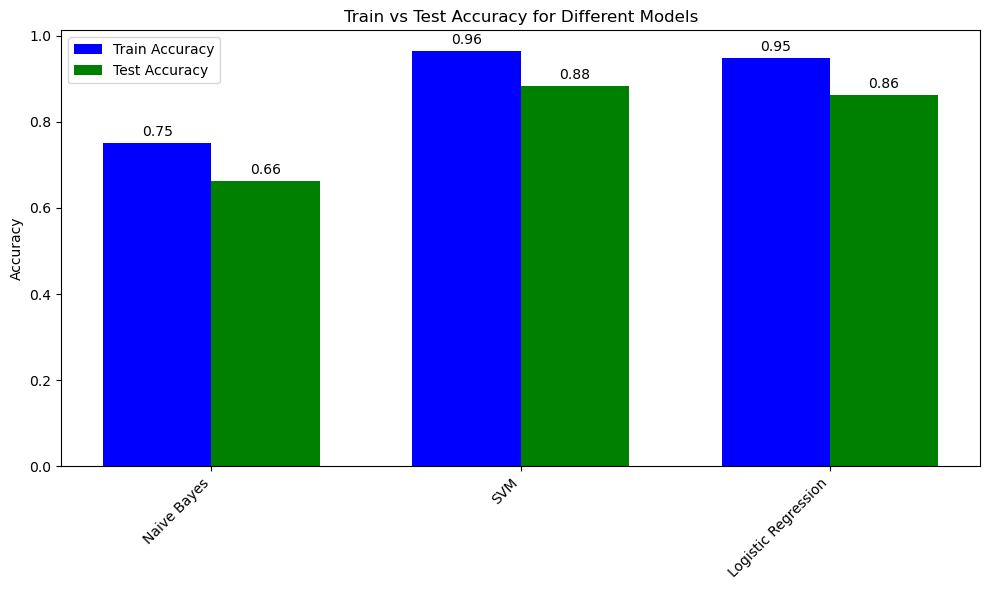

In [630]:
# Extracting accuracy results for plotting
model_names = list(results.keys())
train_accuracies = [results[model]['train']['accuracy'] for model in model_names]
test_accuracies = [results[model]['test']['accuracy'] for model in model_names]

# Plotting Accuracy Comparison
plt.figure(figsize=(10, 6))
x = np.arange(len(model_names))
width = 0.35  # Width of the bars

fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - width / 2, train_accuracies, width, label='Train Accuracy', color='b')
rects2 = ax.bar(x + width / 2, test_accuracies, width, label='Test Accuracy', color='g')

ax.set_ylabel('Accuracy')
ax.set_title('Train vs Test Accuracy for Different Models')
ax.set_xticks(x)
ax.set_xticklabels(model_names, rotation=45, ha='right')
ax.legend()

# Add accuracy values on top of bars
def add_values(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

add_values(rects1)
add_values(rects2)

plt.tight_layout()
plt.show()

#### 5.2 Confusion Matrix of each Model

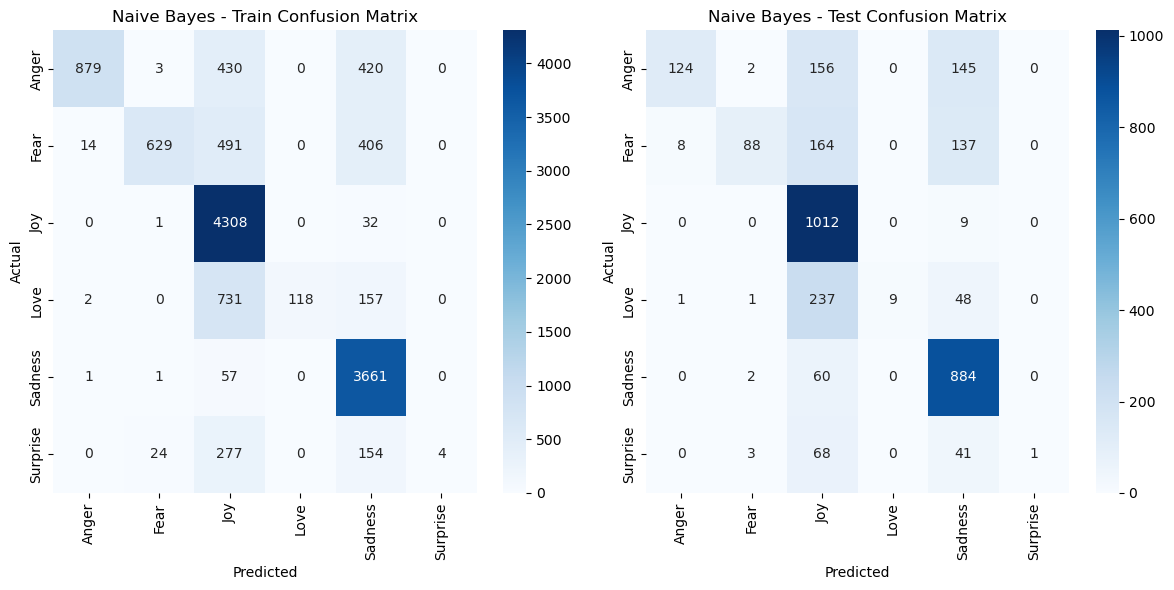

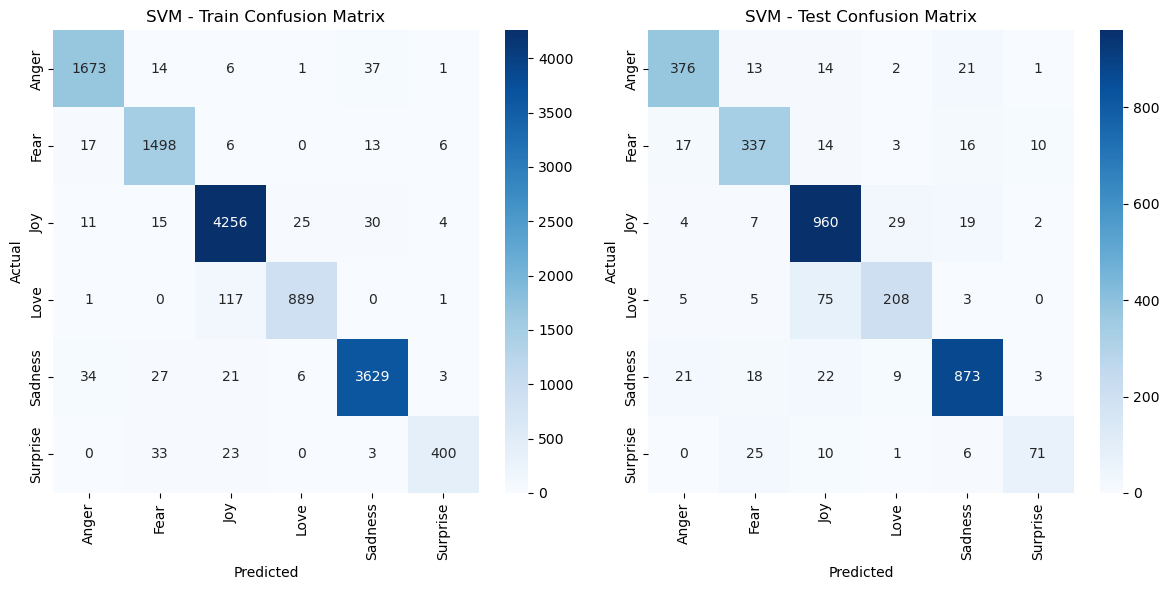

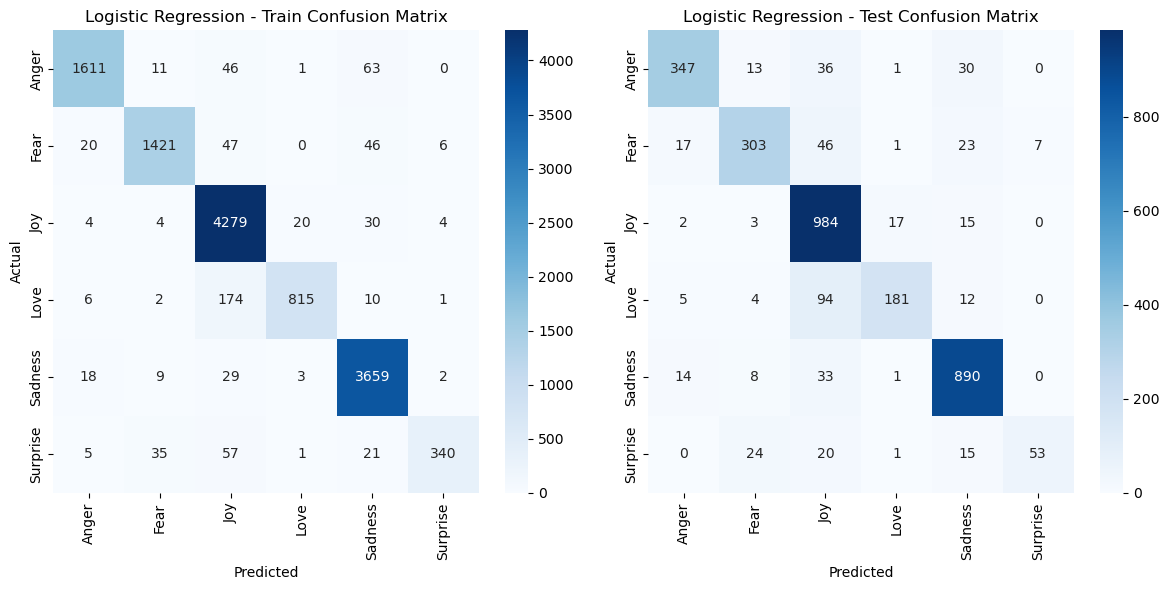

In [648]:
# Define emotion categories based on your provided labels
emotion_labels = ["Anger", "Fear", "Joy", "Love", "Sadness", "Surprise"]

# Plotting confusion matrices for each model, with separate plots for train and test
for model_name in model_names:
    # Getting confusion matrix for both train and test sets
    cm_train = results[model_name]['train']['confusion_matrix']
    cm_test = results[model_name]['test']['confusion_matrix']

    # Create a figure with two subplots (one for train and one for test confusion matrix)
    fig, axs = plt.subplots(1, 2, figsize=(12, 6))

    # Plotting confusion matrix for train data (left plot)
    sns.heatmap(cm_train, annot=True, fmt="d", cmap="Blues", 
                xticklabels=emotion_labels, yticklabels=emotion_labels, ax=axs[0])
    axs[0].set_title(f"{model_name} - Train Confusion Matrix")
    axs[0].set_xlabel("Predicted")
    axs[0].set_ylabel("Actual")

    # Plotting confusion matrix for test data (right plot)
    sns.heatmap(cm_test, annot=True, fmt="d", cmap="Blues", 
                xticklabels=emotion_labels, yticklabels=emotion_labels, ax=axs[1])
    axs[1].set_title(f"{model_name} - Test Confusion Matrix")
    axs[1].set_xlabel("Predicted")
    axs[1].set_ylabel("Actual")

    # Adjust layout and display
    plt.tight_layout()
    plt.show()
